In [ ]:
import pandas as pd

In [ ]:
dataset= pd.read_excel("/content/drive/MyDrive/EVDS.xlsx")

In [ ]:
dataset.head()

,Tarih,TP DK EUR A YTL,TP DK EUR S YTL,Doldurulmus_Alis,Doldurulmus_Satis
0,NaN,NaN,NaN,NaN,NaN
1,02-01-2020,6.6621,6.6741,6.6621,6.6741
2,03-01-2020,6.6630,6.6750,6.6630,6.6750
3,04-01-2020,6.6630,6.6750,6.6630,6.6750
4,05-01-2020,6.6630,6.6750,6.6630,6.6750


In [ ]:
dataset.drop(["TP DK EUR A YTL","TP DK EUR S YTL"], axis=1, inplace=True)
display(dataset.head())

,Tarih,Doldurulmus_Alis,Doldurulmus_Satis
0,NaN,NaN,NaN
1,02-01-2020,6.6621,6.6741
2,03-01-2020,6.6630,6.6750
3,04-01-2020,6.6630,6.6750
4,05-01-2020,6.6630,6.6750


In [ ]:
dataset.drop(index=0, inplace=True)
display(dataset.head())

,Tarih,Doldurulmus_Alis,Doldurulmus_Satis
1,02-01-2020,6.6621,6.6741
2,03-01-2020,6.6630,6.6750
3,04-01-2020,6.6630,6.6750
4,05-01-2020,6.6630,6.6750
5,06-01-2020,6.6464,6.6584


### PROPHET modeli ile tahmin oluşturma

In [ ]:
from prophet import Prophet

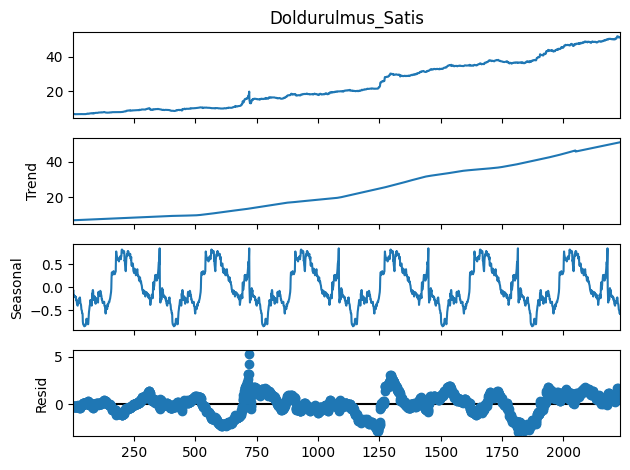

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dataset.Doldurulmus_Satis, model='additive', extrapolate_trend='freq', period=365)

decompose.plot().show()

In [ ]:
df_prophet = dataset[["Tarih","Doldurulmus_Satis"]].copy()
df_prophet

,Tarih,Doldurulmus_Satis
1,02-01-2020,6.6741
2,03-01-2020,6.6750
3,04-01-2020,6.6750
4,05-01-2020,6.6750
5,06-01-2020,6.6584
...,...,...
2227,05-02-2026,51.4260
2228,06-02-2026,51.3365
2229,07-02-2026,51.3365
2230,08-02-2026,51.3365


In [ ]:
df_prophet.columns = ["ds","y"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], dayfirst=True)
df_prophet

,ds,y
1,2020-01-02,6.6741
2,2020-01-03,6.6750
3,2020-01-04,6.6750
4,2020-01-05,6.6750
5,2020-01-06,6.6584
...,...,...
2227,2026-02-05,51.4260
2228,2026-02-06,51.3365
2229,2026-02-07,51.3365
2230,2026-02-08,51.3365


In [ ]:
model = Prophet(
    weekly_seasonality=True,
    daily_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=0.01,
    growth="linear",
    seasonality_mode="additive",

)

In [ ]:
model.fit(df_prophet)

In [ ]:
from datetime import datetime
today = pd.to_datetime(datetime.today())
end_of_year = pd.to_datetime(f"{today.year}-12-31")

In [ ]:
days_left = (end_of_year - today).days

In [ ]:
future = model.make_future_dataframe(periods=days_left)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
2550,2026-12-26,63.0,60.0,66.0
2551,2026-12-27,63.0,60.0,66.0
2552,2026-12-28,63.0,60.0,66.0
2553,2026-12-29,63.0,60.0,66.0
2554,2026-12-30,63.0,60.0,66.0


In [ ]:
import matplotlib.pyplot as plt

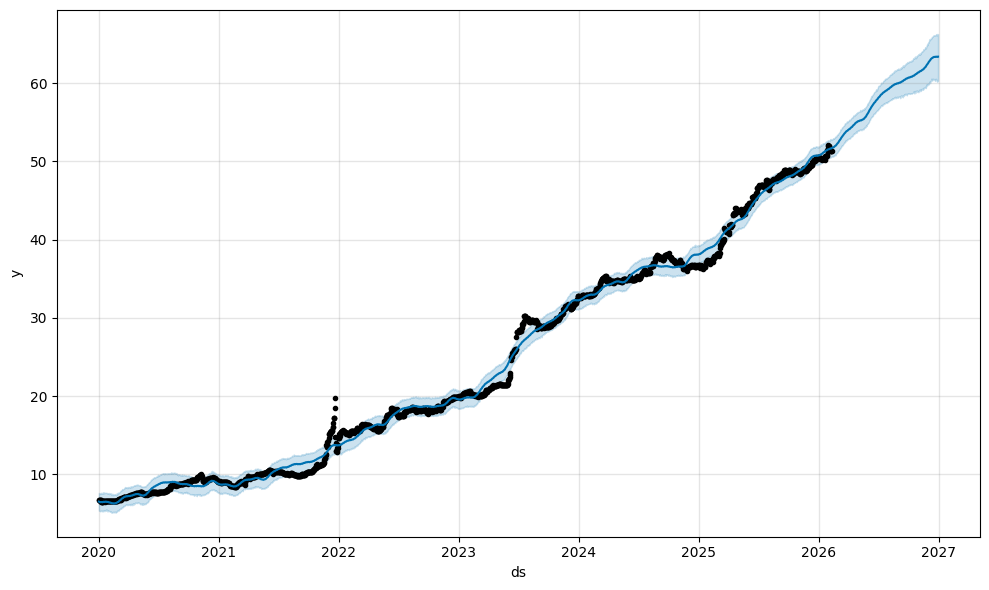

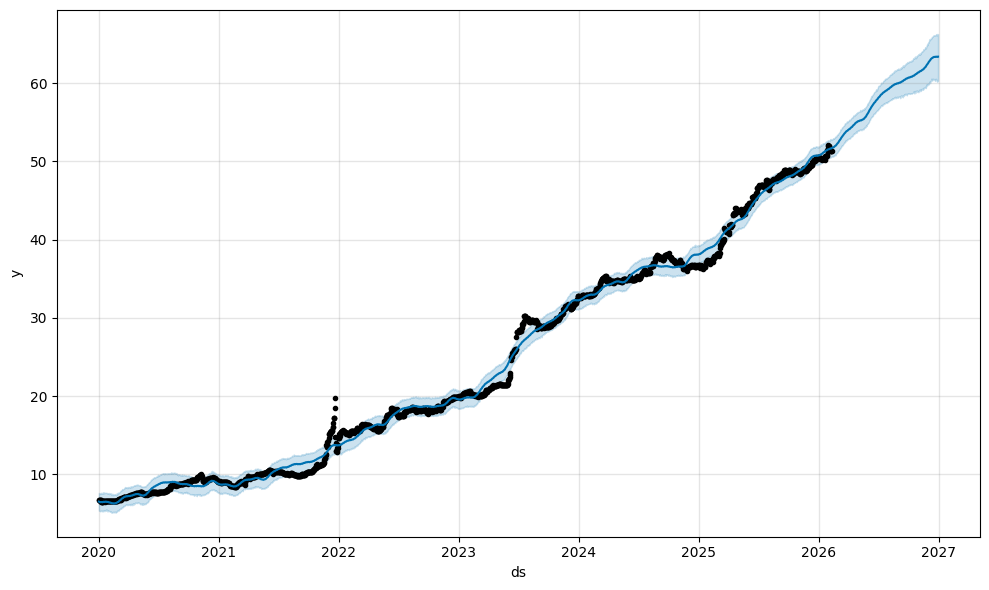

In [ ]:
model.plot(forecast)


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,6.867718,5.388196,7.636210,6.867718,6.867718,-0.330953,-0.330953,-0.330953,0.017179,0.017179,0.017179,-0.348132,-0.348132,-0.348132,0.0,0.0,0.0,6.536765
1,2020-01-03,6.873915,5.351503,7.588767,6.873915,6.873915,-0.351659,-0.351659,-0.351659,0.017294,0.017294,0.017294,-0.368953,-0.368953,-0.368953,0.0,0.0,0.0,6.522256
2,2020-01-04,6.880112,5.400698,7.628964,6.880112,6.880112,-0.390296,-0.390296,-0.390296,-0.002905,-0.002905,-0.002905,-0.387391,-0.387391,-0.387391,0.0,0.0,0.0,6.489816
3,2020-01-05,6.886309,5.327905,7.565365,6.886309,6.886309,-0.426548,-0.426548,-0.426548,-0.023108,-0.023108,-0.023108,-0.403440,-0.403440,-0.403440,0.0,0.0,0.0,6.459761
4,2020-01-06,6.892506,5.292611,7.518378,6.892506,6.892506,-0.439700,-0.439700,-0.439700,-0.022555,-0.022555,-0.022555,-0.417145,-0.417145,-0.417145,0.0,0.0,0.0,6.452806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2026-12-26,63.510721,60.436294,66.272244,60.617998,66.045328,-0.158342,-0.158342,-0.158342,-0.002905,-0.002905,-0.002905,-0.155437,-0.155437,-0.155437,0.0,0.0,0.0,63.352379
2551,2026-12-27,63.545322,60.168683,66.080831,60.640937,66.096736,-0.211327,-0.211327,-0.211327,-0.023108,-0.023108,-0.023108,-0.188219,-0.188219,-0.188219,0.0,0.0,0.0,63.333994
2552,2026-12-28,63.579922,60.236955,66.114275,60.664419,66.148144,-0.242559,-0.242559,-0.242559,-0.022555,-0.022555,-0.022555,-0.220004,-0.220004,-0.220004,0.0,0.0,0.0,63.337363
2553,2026-12-29,63.614523,60.241063,66.179018,60.687901,66.199553,-0.240296,-0.240296,-0.240296,0.010153,0.010153,0.010153,-0.250449,-0.250449,-0.250449,0.0,0.0,0.0,63.374227


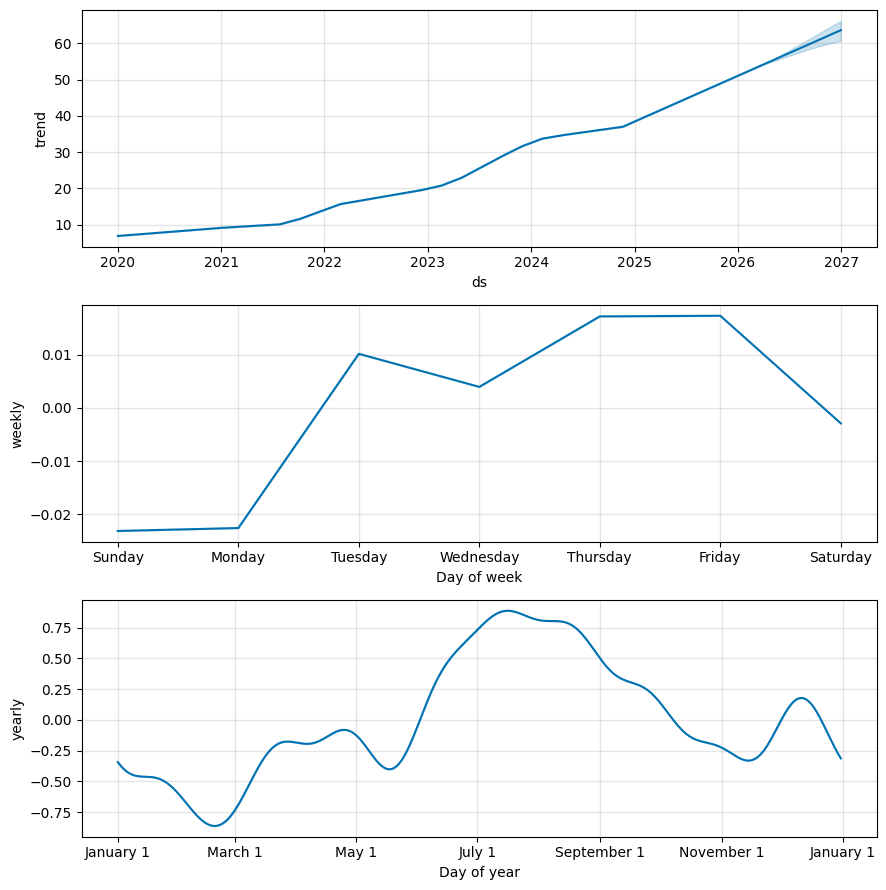

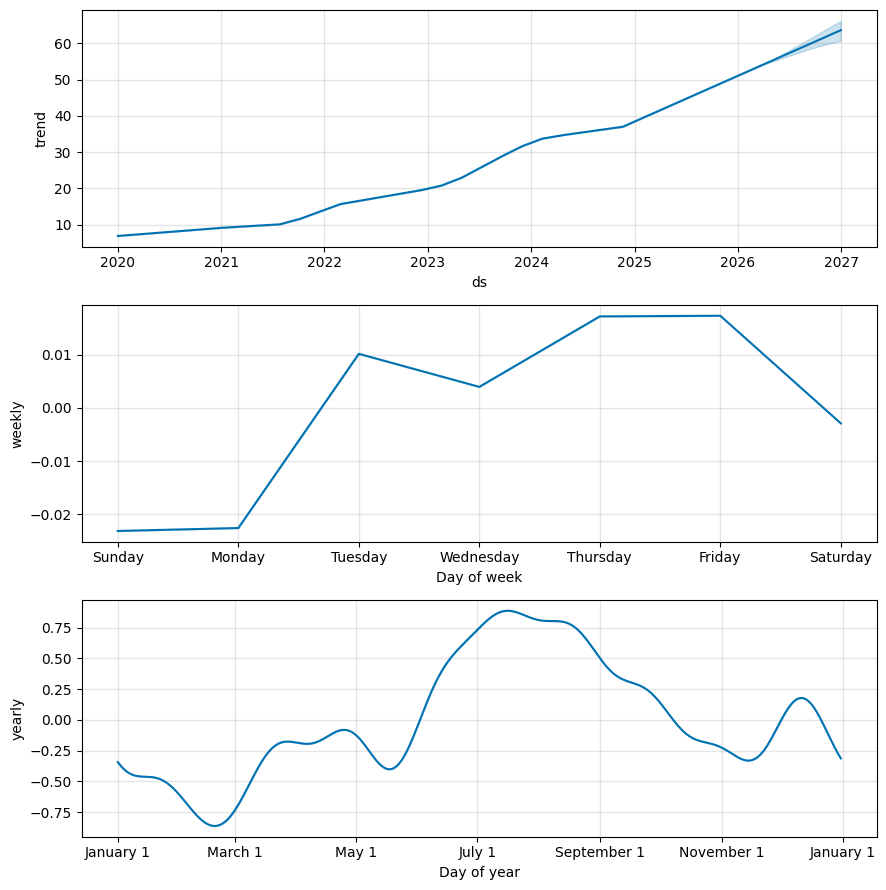

In [ ]:
model.plot_components(forecast)


### SARIMA ile tahmin yapma

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.4 MB/s eta 0:00:00


In [ ]:
import pmdarima as pmd
model=pmd.auto_arima(df_prophet['y'],start_p= 1 ,start_q= 1 ,test= 'kpss' ,m= 7 ,seasonal= False ,trace= True )

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1303.692, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1296.280, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1305.206, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1305.495, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1271.077, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1303.723, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1301.726, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1283.894, Time=0.27 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 7.009 seconds


In [ ]:
n_periods = days_left  # Use the previously calculated days_left
forecast_sarima = model.predict(n_periods=n_periods)
print("SARIMA Forecast:")
print(forecast_sarima)

SARIMA Forecast:
2232    51.354649
2233    51.374671
2234    51.394693
2235    51.414716
2236    51.434738
          ...    
2551    57.741743
2552    57.761766
2553    57.781788
2554    57.801810
2555    57.821832
Length: 324, dtype: float64
